In [9]:
# IMPORT BIBLIOTEK
import numpy as np
import pandas as pd
import sklearn as s
import matplotlib.pyplot as plt
import keras as k
import seaborn as sb
sb.set()



In [10]:
#conda install -c conda-forge imbalanced-learn
import imblearn 
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.5.0


In [11]:
# IMPORT DANYCH
dcc = pd.read_csv('C:/Users/eweli/Desktop/creditcard.csv')

In [12]:
# INFORMACJE O WYMIARZE DANYCH I PRÓBKA
print(dcc.shape)
dcc.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# GŁOWNE STATYSTYKI DANYCH, DANE ZNORMALIZOWANE, PODDANE ALGORYTMOWI PCA
dcc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#DANE KOMPLETNE, NIE WYSTĘPUJĄ BRAKI W DANYCH
dcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [13]:
# ROZKŁAD ZMIENNEJ KLASYFIKUJĄCEJ WSKAZUJE NA ZBIÓR NIEZBILANSOWANY


trx = {0:'Normal', 1:'Fraud'}
print(dcc.Class.value_counts().rename(index = trx))



Normal    284315
Fraud        492
Name: Class, dtype: int64


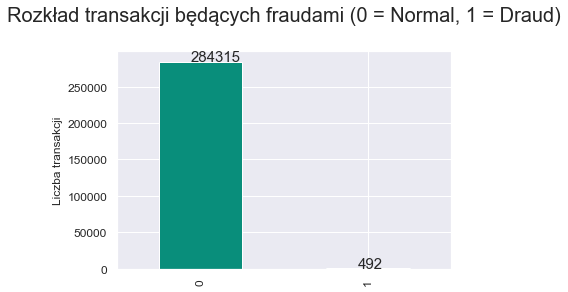

In [13]:
# ROZKŁAD ZMIENNEJ KLASYFIKUJĄCEJ WSKAZUJE NA ZBIÓR NIEZBILANSOWANY

ax = dcc['Class'].value_counts().plot(kind='bar', figsize=(6, 4), fontsize=12, color='#098E7B')
ax.set_title('Rozkład transakcji będących fraudami (0 = Normal, 1 = Draud)', size=20, pad=30)
ax.set_ylabel('Liczba transakcji', fontsize=12)


for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)


In [14]:
# SMOTE : SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority 
#class, based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

y = dcc['Class']
x = dcc.drop('Class', axis = 1)

In [15]:
print(smote)

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=None, ratio=None,
      sampling_strategy='minority', svm_estimator='deprecated')


In [16]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x, y)
#plt.plot(x_sm, y_sm, 'SMOTE over-sampling')
x = x_sm
y = y_sm

1    284315
0    284315
dtype: int64

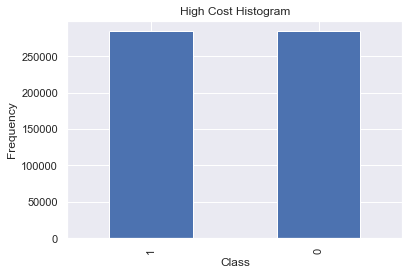

In [13]:
pd.value_counts(y).plot.bar()
plt.title('High Cost Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y)

In [19]:
# Podział zbioru na uczący i testowy
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [20]:
len(x_train)

426472

In [21]:
len(x_test)

142158

In [20]:
# Model regresji logistycznej
from sklearn import linear_model
lr = linear_model.LogisticRegression(C=1e5)

In [21]:
lr.fit(x_train, y_train)

C:\Users\eweli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_rl = lr.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

In [24]:
print(confusion_matrix(y_test,y_pred_rl))

[[84063  1476]
 [ 4187 80863]]


In [25]:
print(accuracy_score(y_test,y_pred_rl))

0.9668032522612829


In [26]:
# Model klasyfikatora drzewa decyzyjnego - wspołczynnik oceny niejednorodności Gini

from sklearn.tree import DecisionTreeClassifier
drzewo = DecisionTreeClassifier(criterion="gini")
model_drzewo_gini = drzewo.fit(x_train, y_train)

In [27]:
y_pred_ddG  = model_drzewo_gini.predict(x_test)

In [28]:
print(confusion_matrix(y_test,y_pred_ddG ))

[[85318   221]
 [   75 84975]]


In [29]:
print(accuracy_score(y_test,y_pred_ddG ))

0.9982648353645311


In [31]:
# Model regresora drzewa decyzyjnego - błąd średniokwadratowy MSE
from sklearn.tree import DecisionTreeRegressor
drzewo_reg = DecisionTreeRegressor(criterion="mse")
model_drzewo_mse = drzewo_reg.fit(x_train, y_train)

In [32]:
print(DecisionTreeRegressor)

<class 'sklearn.tree.tree.DecisionTreeRegressor'>


In [33]:
y_pred_ddmse  = model_drzewo_mse.predict(x_test)

In [34]:
print(confusion_matrix(y_test,y_pred_ddmse ))

[[85308   231]
 [   77 84973]]


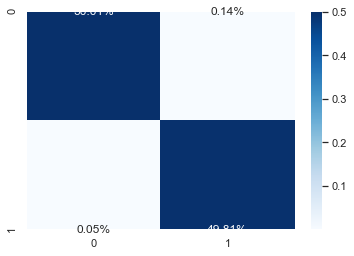

In [35]:
cm1 = confusion_matrix(y_test, y_pred_ddmse)
sb.heatmap(cm1/np.sum(cm1), annot = True, fmt='0.2%',cmap='Blues')

In [36]:
print(accuracy_score(y_test,y_pred_ddmse ))

0.9981944908522824


In [39]:
#conda install -c conda-forge keras
# sieci neuronowe

from keras import models as km
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [42]:
# funkcja aktywacji liniowa RELU
model = Sequential()
model.add(Dense(20, input_dim=30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
model.fit(x_train, y_train, epochs=8, batch_size=1)


Epoch 1/8
398041/398041 [==============================] - 786s 2ms/step - loss: 3.3586 - accuracy: 0.6262
Epoch 2/8
398041/398041 [==============================] - 710s 2ms/step - loss: 0.7002 - accuracy: 0.5267
Epoch 3/8
398041/398041 [==============================] - 678s 2ms/step - loss: 0.4167 - accuracy: 0.7990
Epoch 4/8
398041/398041 [==============================] - 1391s 3ms/step - loss: 0.2127 - accuracy: 0.9354
Epoch 5/8
398041/398041 [==============================] - 1362s 3ms/step - loss: 0.1834 - accuracy: 0.9444
Epoch 6/8
398041/398041 [==============================] - 1387s 3ms/step - loss: 0.1613 - accuracy: 0.9536
Epoch 7/8
398041/398041 [==============================] - ETA: 0s - loss: 0.1591 - accuracy: 0.95 - 1464s 4ms/step - loss: 0.1591 - accuracy: 0.9578
Epoch 8/8
398041/398041 [==============================] - 1222s 3ms/step - loss: 0.1431 - accuracy: 0.9589


In [44]:
# make class predictions with the model
predictions = model.predict_classes(x_test)

In [45]:
print(accuracy_score(y_test,predictions ))

0.4986253509898059
